xgboost (extreme gradient boosting) is a librarie for creating machine learning models  <br>
it's often used in kaggle's winning kernels.
xgboost basically builts many decission trees with weak accuracy which when put together result in very good and performant predictions 
<img src="img/xgb_descr.png">

Import libraries and prepare data

In [8]:
import xgboost as xgb
import pandas as pd 
from sklearn.model_selection import train_test_split
data=pd.read_csv('../data/ecommerce_data.csv')
X = data.drop('user_action', axis=1)
y = data.user_action
dumie_features = ['T0to6', 'T6to12', 'T12to18', 'T18to24']
dummies = pd.get_dummies(X.time_of_day, prefix=dumie_features)
X[dumie_features] = dummies
X = X.drop(labels=['time_of_day'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
%pylab inline
pylab.rcParams['figure.figsize'] = (15,15)


Populating the interactive namespace from numpy and matplotlib


Now create a model and train it 
Important xgboost hyper parameters to improve the model are: 
    - learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
    - max_depth: determines how deeply each tree is allowed to grow during any boosting round.
    - subsample: percentage of samples used per tree. Low value can lead to underfitting.
    - colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
    - n_estimators: number of trees you want to build.
    - objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification           problems with only decision, binary:logistic for classification problems with probability.
    - gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value               leads to fewer splits. Supported only for tree-based learners.
    - alpha: L1 regularization on leaf weights. A large value leads to more regularization.
    - lambda: L2 regularization on leaf weights and is smoother than L1 regularization.
There are two Classes in xgboost for creating a model XGBRegressor and XGBClassifier


In [9]:
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=4, n_estimations=10000, reg_lambda=1, objective='leg:logistic')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimations=10000,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

After training our model we can plot all trees of our model with plot_tree(num_trees=[tree_number])

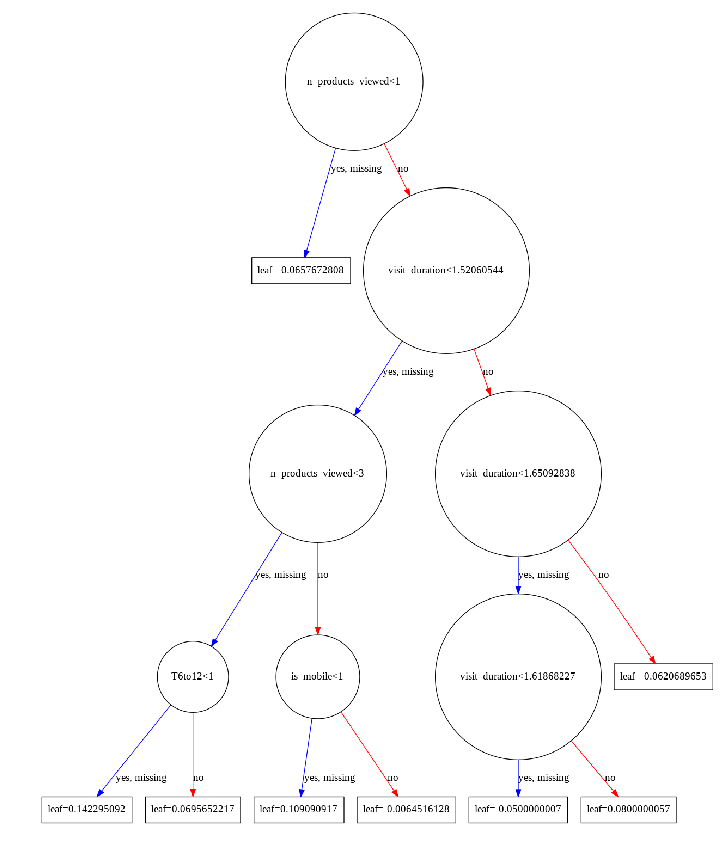

In [10]:
import matplotlib.pyplot as plt
import matplotlib
import graphviz
xgb.plot_tree(model,  num_trees=1)
plt.show()

Another important plotting feature of xgboost is the feature importance <br>
This shows us how often a feature is in a tree

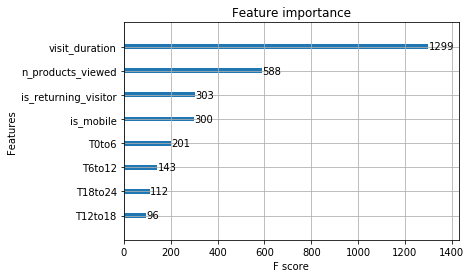

In [4]:
xgb.plot_importance(model)

Now we can predict whether or not our model is good by testing it with our test data

In [5]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 1, 3, 1,
       1, 1, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 0, 0, 3, 0, 1, 0, 1, 0, 1, 2,
       0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1])

And calculate the accuracy of our prediction 
This will only work for Classification problems to test the performance
For regression problems there are other ways to go like using the MSE(mean squared error)

In [6]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',(accuracy * 100),'%')

Accuracy:  97.0 %


With Scykit-learn we do ahve the üosibility to test our hyper parameters against other configurations which can be helpfull in optimizing them

In [7]:
from sklearn.model_selection import GridSearchCV
test_model = xgb.XGBClassifier()
test_params = {
  'max_depth': [10 ],
  'learning_rate': [0.01, 0.1, 0.001],
  'n_estimators': [ 100, 1000],
  'booster': ['gbtree'],
  'reg_lambda': [1, 0],
}
model = GridSearchCV(estimator=test_model, param_grid=test_params, cv=3)
model.fit(X, y)
print(model.best_params_)
model = model.best_estimator_

{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 1000, 'reg_lambda': 1}
